# OUtlier detection & removing techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wh = pd.read_csv('weight-height.csv')
df = wh.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.drop(columns='Weight',inplace=True)

In [4]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
df.shape

(10000, 2)

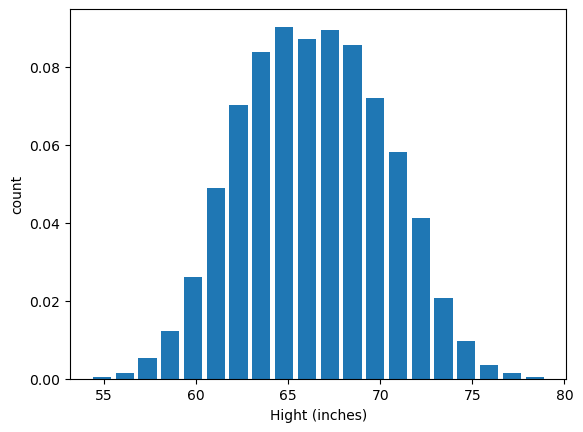

In [6]:
plt.hist(df.Height, bins=20,rwidth=0.8,density=True)
plt.xlabel('Hight (inches)')
plt.ylabel('count');

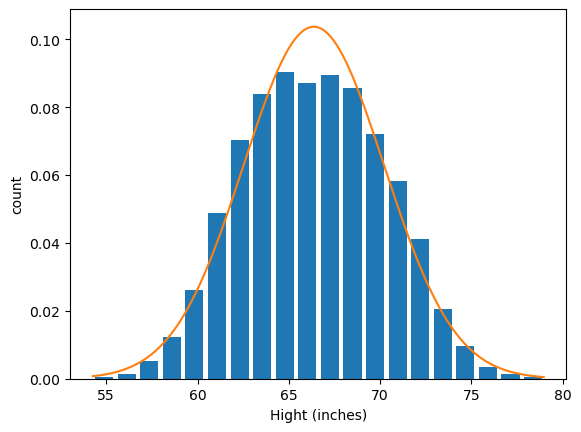

In [7]:
plt.hist(df.Height, bins=20,rwidth=0.8,density=True)
plt.xlabel('Hight (inches)')
plt.ylabel('count');

from scipy.stats import norm

rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(),df.Height.std()))

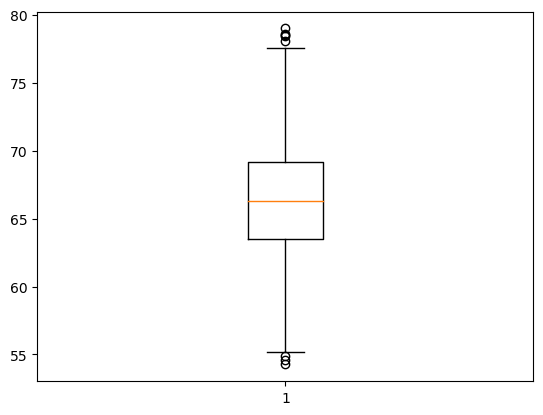

In [8]:
plt.boxplot(df.Height);

## Removing the outlier using standard deviation

In [9]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714094

In [10]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250154

In [11]:
outliers = df[(df.Height>upper_limit) | (df.Height<lower_limit)]
outliers

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [12]:
df1 = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df1.shape

(9993, 2)

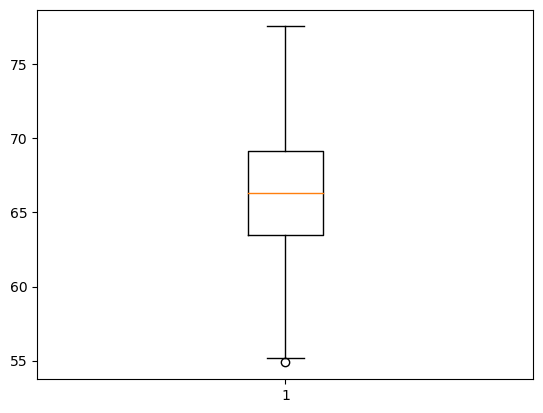

In [13]:
plt.boxplot(df1.Height);

## Removing the outlier using Z-score

In [14]:
df['zscore'] = (df.Height - df.Height.mean())/ df.Height.std()
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [15]:
outliers = df[ (df['zscore']>3) | (df['zscore']<-3)]
outliers

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [16]:
df2 = df[(df.zscore < 3 ) & (df.zscore > -3)]
df2.shape

(9993, 3)

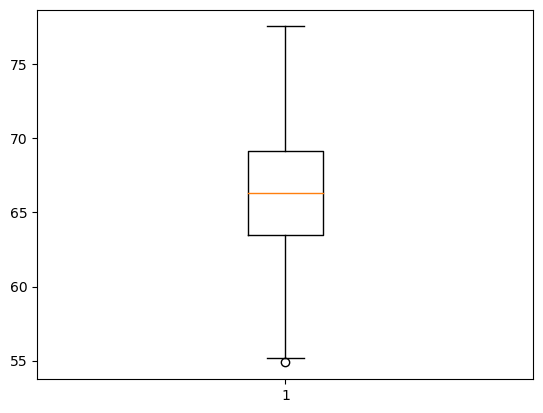

In [17]:
plt.boxplot(df2.Height);

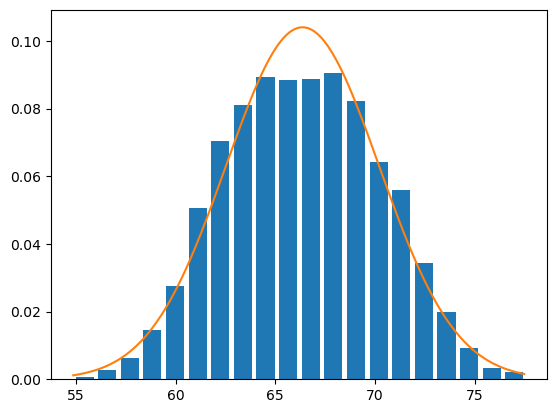

In [18]:
plt.hist(df2.Height,bins=20,rwidth=0.8,density=True);

rng = np.arange(df2.Height.min(),df2.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df2.Height.mean(),df2.Height.std()))

##  Removing the outlier using IQR 

In [19]:
q1 = np.quantile(df.Height,0.25)
q1

63.505620481218955

In [20]:
q3 = np.quantile(df.Height,0.75)
q3

69.1742617268347

In [21]:
iqr = q3-q1
iqr

5.668641245615746

In [22]:
lower_quantile = q1-1.5*iqr
lower_quantile

55.00265861279534

In [23]:
upper_quantile = q3 + 1.5*iqr
upper_quantile

77.67722359525831

In [24]:
outliers3 = df[(df.Height<lower_quantile)| (df.Height>upper_quantile)]
outliers3

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027


In [25]:
df3 = df[(df.Height>lower_quantile) & (df.Height<upper_quantile)]
df3.shape

(9992, 3)

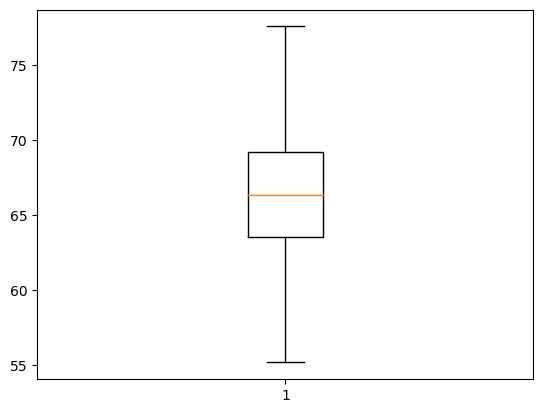

In [26]:
plt.boxplot(df3.Height);